# Support Vector Machines - SVM

# Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the 
dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in 
the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all 
patients here are females at least 21 years old of Pima Indian heritage.

# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the 
number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# 1. Import Libraries and load the dataset

In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# 2. Check dimension of dataset

In [2]:
df = pd.read_csv('Diabetes.csv')
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
691,13,158,114,0,0,42.3,0.257,44,1
111,8,155,62,26,495,34.0,0.543,46,1
594,6,123,72,45,230,33.6,0.733,34,0
202,0,108,68,20,0,27.3,0.787,32,0
260,3,191,68,15,130,30.9,0.299,34,0


# 3. Check distribution of dependent variable, Outcome and plot it

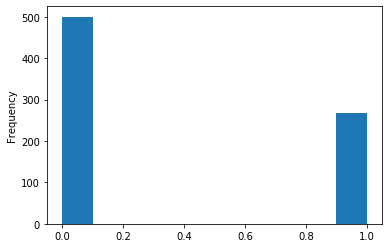

In [7]:
df["Outcome"].plot(kind='hist')

# 4. Out of 768 data points, 500 are labeled as 0 and 268 as 1.
Outcome 0 means No diabetes, outcome 1 means diabetes, Give a countplot

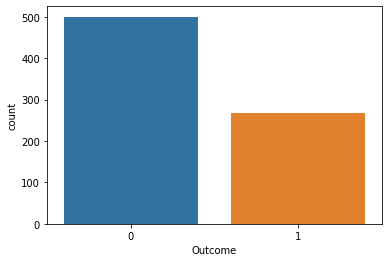

In [10]:
sns.countplot("Outcome", data=df)

# 5. Check data distribution using summary statistics and provide your findings(Insights)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Missing values in Glucose, Blood Pressure, SkinThicknes, BMI

# 6. Do correlation analysis and bivariate viualization with Insights

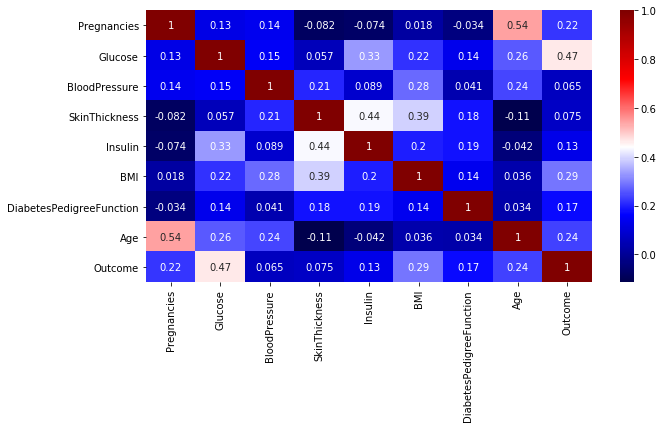

In [23]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True, cmap="seismic")

# 7. Plot a scatter Matrix

In [60]:
df["BloodPressure"] 

1      66
2      64
3      66
4      40
5      74
6      50
7       0
8      70
9      96
10     92
11     74
12     80
13     60
14     72
15      0
16     84
17     74
18     30
19     70
20     88
21     84
22     90
23     80
24     94
25     70
26     76
27     66
28     82
29     92
30     75
       ..
738    60
739    74
740    80
741    44
742    58
743    94
744    88
745    84
746    94
747    74
748    70
749    62
750    70
751    78
752    62
753    88
754    78
755    88
756    90
757    72
758    76
759    92
760    58
761    74
762    62
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 767, dtype: int64

# 8. Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable

In [31]:
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

print(sss)       

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)
TRAIN: [698 664 488 316   9 599 192 491 102 648 557 275 645 160 451 245 298 617
 206 376 383   0 130 696 233 476 729 512  95 619 701 616 493 580 411  70
  28 346 445 756 629 120 606 531 502  60 700 381 271 119 146 468 141 370
 550 675 695  72  44  79 730 303 475 686 158 384 704 417 403 365 440 410
 400 335 250 179  22 363 564  14 106 611 341 165 278 640 516 558 653  18
 621 718 157 229  15 337 647 597 750 690 292 666 396 539 478 385 182 306
 167 196  26 118  57 528 646 450 121 559 311 486 171 650 412 572 251 101
 761 226 733 217 430  99 246 170 364 184 174 176 282 114 287  33 699 738
 511 149 500 627 413 321 123 670 758 402 501 188 523 498 681 767 258 424
 656 290 283 443  30  23 302 614 265 112 189 343 725 555 752 514  82 222
 211 399 663 763 220 679 585 717 274 660 173  89 155   3 284  17 669 256
 612 518 671 428  20 605 454 735 116 709 532 212 694 702 563  96 336  40
 185 380  86 270 156 7

In [34]:
X_train.shape

(384, 8)

# 9. Train Support Vector Machine Model

In [45]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.65      1.00      0.79       250
         Yes       0.00      0.00      0.00       134

    accuracy                           0.65       384
   macro avg       0.33      0.50      0.39       384
weighted avg       0.42      0.65      0.51       384



/home/imperio/.virtualenvs/ML/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/imperio/.virtualenvs/ML/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 10. Scale the data points using MinMaxScaler

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_trainPP = scaler.transform(X_train)

# 11. Fit SVM Model on Scale data and give your observation

In [54]:
clf.fit(X_trainPP, y_train)
print(classification_report(y_test, clf.predict(scaler.transform(X_test)), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.79      0.80      0.79       250
         Yes       0.62      0.61      0.61       134

    accuracy                           0.73       384
   macro avg       0.70      0.70      0.70       384
weighted avg       0.73      0.73      0.73       384



/home/imperio/.virtualenvs/ML/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 12. Try improving the model accuracy using C=1000

In [53]:
clf = SVC(C=1000)
clf.fit(X_trainPP, y_train)
print(classification_report(y_test, clf.predict(scaler.transform(X_test)), target_names=["No", "Yes"]))

              precision    recall  f1-score   support

          No       0.79      0.80      0.79       250
         Yes       0.62      0.61      0.61       134

    accuracy                           0.73       384
   macro avg       0.70      0.70      0.70       384
weighted avg       0.73      0.73      0.73       384



/home/imperio/.virtualenvs/ML/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Here, increasing C allows us to improve the model, resulting in 81.2% train set accuracy.